In [5]:
from math import log
import operator
from sklearn import datasets

#def createDataSet():

def load_data():
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
    lables=iris.feature_names
    y_name=iris
    


dict_keys(['target_names', 'target', 'DESCR', 'feature_names', 'data'])
(150, 4)
[ 5.1  3.5  1.4  0.2]
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [38]:
from math import log
import operator
from sklearn import datasets
from sklearn.model_selection import train_test_split

#def createDataSet():

def load_data():
    iris = datasets.load_iris()
    X = iris.data.tolist()
    y = iris.target 
    y_name=iris.target_names
    #print(X)
    #print(len(X))
    for i in range(len(X)):
        X[i].append(y_name[y[i]])
    #print(X)
    x_train, x_test = train_test_split(X, test_size=0.33, shuffle=True)
    lables=iris.feature_names
   
    return x_train, x_test,lables,y_name

In [41]:
x_train, x_test,lables,y_name=load_data()
print(len(x_train))

100


In [49]:
from math import log
import operator
from sklearn import datasets
from sklearn.model_selection import train_test_split

#def createDataSet():

def load_data():
    iris = datasets.load_iris()
    X = iris.data.tolist()
    y = iris.target 
    y_name=iris.target_names
    #print(X)
    #print(len(X))
    for i in range(len(X)):
        X[i].append(y_name[y[i]])
    #print(X)
    x_train, x_test = train_test_split(X, test_size=0.33, shuffle=True)
    lables=iris.feature_names
   
    return x_train, x_test,lables

"""
计算数据集D的香农熵
"""
def calc_info_D(data_set):
    num_entries = len(data_set)
    label_nums = {} #为每个类别建立字典，value为对应该类别的数目
    for entry in data_set:
        label = entry[-1]
        if label in label_nums.keys():
            label_nums[label]+=1
        else:
            label_nums[label]=1
    info_D = 0.0
    for label in label_nums.keys():
        prob = float(label_nums[label])/num_entries
        info_D -= prob * log(prob,2)
    return info_D

"""
按属性划分子数据集，分为离散属性的划分与连续属性的划分
index为划分属性的下标，value在离散属性划分的情况下为划分属性的值，continuous决定了是离散还是连续属性划分
part在连续属性划分时使用，为0时表示得到划分点左边的数据集，1时表示得到划分点右边的数据集
"""
def split_data_set(data_set, index, value, part=0):
    res_data_set = []
    for entry in data_set:
        if part == 0 and float(entry[index])<= value: #求划分点左侧的数据集
            reduced_entry = entry[:index]
            reduced_entry.extend(entry[index + 1:]) #划分后去除数据中第index列的值
            res_data_set.append(reduced_entry)
        if part ==1 and float(entry[index])> value: #求划分点右侧的数据集
            reduced_entry = entry[:index]
            reduced_entry.extend(entry[index + 1:])
            res_data_set.append(reduced_entry)
    return res_data_set

def attribute_selection_method(data_set):
    num_attributes = len(data_set[0])-1 #属性的个数，减1是因为去掉了标签
    info_D = calc_info_D(data_set)  #香农熵
    #max_grian_rate = 0.0  #最大信息增益比
    max_info_gain=0
    best_attribute_index = -1
    best_split_point = None
    continuous = False
    for i in range(num_attributes):
        attribute_list = [entry[i] for entry in data_set]  # 求属性列表，此时为连续值
        info_A_D = 0.0  #特征A对数据集D的信息增益
        #split_info_D = 0.0  #数据集D关于特征A的值的熵
        """
        属性为连续值，先对该属性下的所有离散值进行排序
        然后每相邻的两个值之间的中点作为划分点计算信息增益比，对应最大增益比的划分点为最佳划分点
        由于可能多个连续值可能相同，所以通过set只保留其中一个值
        """

        attribute_list = sorted(attribute_list)
        temp_set = set(attribute_list) #通过set来剔除相同的值
        attribute_list = [attr for attr in temp_set]#取得当前属性下的属性值列表
        split_points = []
        for index in range(len(attribute_list) - 1):
            #求出各个划分点
            split_points.append((float(attribute_list[index]) + float(attribute_list[index + 1])) / 2)
        for split_point in split_points:#对划分点进行遍历
            info_A_D = 0.0
            split_info_D = 0.0
            for part in range(2): #最佳划分点将数据一分为二，因此循环2次即可得到两段数据
                sub_data_set = split_data_set(data_set, i, split_point, part)
                prob = len(sub_data_set) / float(len(data_set))
                info_A_D += prob * calc_info_D(sub_data_set)
                #split_info_D -= prob * log(prob, 2)
            #if split_info_D==0:
                #split_info_D+=1
            """
            由于关于属性A的熵split_info_D可能为0，因此需要特殊处理
            常用的做法是把求所有属性熵的平均，为了方便，此处直接加1
            """
            #grian_rate = (info_D - info_A_D) / split_info_D #计算信息增益比
            info_gain=info_D - info_A_D
            if info_gain > max_info_gain:
                max_info_gain = info_gain
                best_split_point = split_point
                best_attribute_index = i
                print([best_attribute_index,best_split_point])
    return best_attribute_index,best_split_point

#统计类别的票数

"""
多数表决：返回标签列表中数量最大的类
"""
def most_voted_attribute(label_list):
    label_nums = {}
    for label in label_list:
        if label in label_nums.keys():
            label_nums[label] += 1
        else:
            label_nums[label] = 1
    sorted_label_nums = sorted(label_nums.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_label_nums[0][0]


"""
决策树的生成，data_set为训练集，attribute_label为属性名列表
决策树用字典结构表示，递归的生成
"""
def generate_decision_tree(data_set ,attribute_label):
    label_list = [entry[-1] for entry in data_set]
    if label_list.count(label_list[0]) == len(label_list): #如果所有的数据都属于同一个类别，则返回该类别
        return label_list[0]
    if len(data_set[0]) == 1: #如果数据没有属性值数据，则返回该其中出现最多的类别作为分类
        return most_voted_attribute(label_list)
    best_attribute_index, best_split_point = attribute_selection_method(data_set)
    best_attribute = attribute_label[best_attribute_index]
    decision_tree = { best_attribute:{}}
    del(attribute_label[best_attribute_index]) #找到最佳划分属性后需要将其从属性名列表中删除
    """
    如果best_split_point为空，说明此时最佳划分属性的类型为离散值，否则为连续值
    """
    if best_split_point == None:
        attribute_list = [entry[best_attribute_index] for entry in data_set]
        attribute_set = set(attribute_list)
        for attribute in attribute_set: #属性的各个值
            sub_labels = attribute_label[:]
            decision_tree[best_attribute][attribute] = generate_decision_tree(
                split_data_set(data_set,best_attribute_index,attribute),sub_labels)
    else:
        """
        最佳划分属性类型为连续值，此时计算出的最佳划分点将数据集一分为二，划分字段取名为<=和>
        """
        sub_labels = attribute_label[:]
        decision_tree[best_attribute]["<="+str(best_split_point)] = generate_decision_tree(
            split_data_set(data_set, best_attribute_index, best_split_point, 0), sub_labels)
        sub_labels = attribute_label[:]
        decision_tree[best_attribute][">" + str(best_split_point)] = generate_decision_tree(
            split_data_set(data_set, best_attribute_index, best_split_point, 1), sub_labels)
    return decision_tree


def decision_tree_predict(decision_tree, attribute_labels, one_test_data):
    first_key = list(decision_tree.keys())[0]
    second_dic = decision_tree[first_key]
    attribute_index = attribute_labels.index(first_key)
    res_label = None
    for key in second_dic.keys(): #属性分连续值和离散值，连续值对应<=和>两种情况
        if key[0] == '<':
            value = float(key[2:])
            if float(one_test_data[attribute_index])<= value:
                if type(second_dic[key]).__name__ =='dict':
                    res_label = decision_tree_predict(second_dic[key], attribute_labels, one_test_data)
                else:
                    res_label = second_dic[key]
        elif key[0] == '>':
            #print(key[1:])
            value = float(key[1:])
            if float(one_test_data[attribute_index]) > value:
                if type(second_dic[key]).__name__ == 'dict':
                    res_label = decision_tree_predict(second_dic[key], attribute_labels, one_test_data)
                else:
                    res_label = second_dic[key]
 
        else:
            if one_test_data[attribute_index] == key:
                if type(second_dic[key]).__name__ =='dict':
                    res_label = decision_tree_predict(second_dic[key], attribute_labels, one_test_data)
                else:
                    res_label = second_dic[key]
    return res_label

if __name__=='__main__':
    x_train, x_test,lables=load_data()
    lable_2=lables.copy()
    decision_tree= generate_decision_tree(x_train,lable_2)
    
    count = 0
    #计算准确率
    for one_test_data in x_test:
        if decision_tree_predict(decision_tree,lables,one_test_data) == one_test_data[-1]:
            count+=1
    accuracy = count/len(x_test)
    print('训练集大小%d，测试集大小%d，准确率为:%.1f%%'%(len(x_train), len(x_test), 100*accuracy))
    


[0, 5.15]
[0, 5.9]
[0, 5.5]
[2, 1.55]
[2, 1.65]
[2, 1.7999999999999998]
[2, 2.45]
[0, 5.0]
[0, 5.699999999999999]
[0, 6.15]
[2, 1.5]
[2, 1.6]
[2, 1.75]
[0, 5.6]
[0, 5.0]
[0, 6.05]
[0, 6.75]
[0, 7.050000000000001]
[0, 2.45]
[0, 2.8499999999999996]
[0, 7.449999999999999]
[0, 6.5]
[0, 6.0]
[0, 5.9]
[0, 2.75]
[0, 3.0]
训练集大小100，测试集大小50，准确率为:98.0%


In [46]:
a=[5, 1, 2, 4, 3]
a=sorted(a)
print(a)

[1, 2, 3, 4, 5]


In [2]:
import matplotlib.pyplot as plt
 
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")
 
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction', \
                            xytext=centerPt, textcoords='axes fraction', \
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)
 
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs
 
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = getTreeDepth(secondDict[key]) + 1
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth
 
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)
 
def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalw, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalw
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD
 
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalw = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalw
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()


[0, 4.65]
[0, 5.4]
[0, 5.5]
[0, 5.75]
[2, 1.6]
[2, 1.7999999999999998]
[2, 2.45]
[0, 5.0]
[0, 5.949999999999999]
[0, 5.75]
[2, 1.35]
[2, 1.55]
[2, 1.65]
[2, 1.75]
[0, 5.85]
[0, 5.95]
[0, 7.050000000000001]
[0, 2.45]
[0, 2.3]
[0, 2.25]
[0, 2.6500000000000004]
[0, 2.8499999999999996]
[0, 7.449999999999999]
[0, 6.55]
[0, 5.949999999999999]
[0, 2.85]
训练集大小100，测试集大小50，准确率为:98.0%


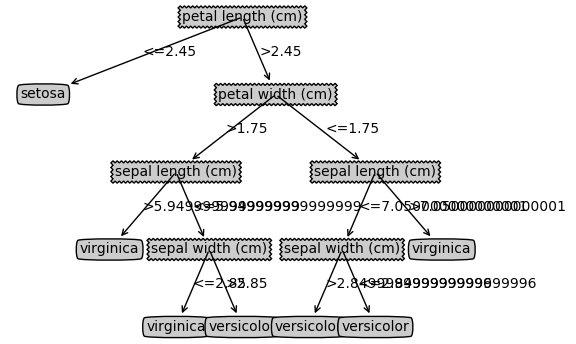

In [11]:
from math import log
import operator
from sklearn import datasets
from sklearn.model_selection import train_test_split

#def createDataSet():

def load_data():
    iris = datasets.load_iris()
    X = iris.data.tolist()
    y = iris.target 
    y_name=iris.target_names
    #print(X)
    #print(len(X))
    for i in range(len(X)):
        X[i].append(y_name[y[i]])
    #print(X)
    x_train, x_test = train_test_split(X, test_size=0.33, shuffle=True)
    lables=iris.feature_names
   
    return x_train, x_test,lables

"""
计算数据集D的香农熵
"""
def calc_info_D(data_set):
    num_entries = len(data_set)
    label_nums = {} #为每个类别建立字典，value为对应该类别的数目
    for entry in data_set:
        label = entry[-1]
        if label in label_nums.keys():
            label_nums[label]+=1
        else:
            label_nums[label]=1
    info_D = 0.0
    for label in label_nums.keys():
        prob = float(label_nums[label])/num_entries
        info_D -= prob * log(prob,2)
    return info_D

"""
按属性划分子数据集，分为离散属性的划分与连续属性的划分
index为划分属性的下标，value在离散属性划分的情况下为划分属性的值，continuous决定了是离散还是连续属性划分
part在连续属性划分时使用，为0时表示得到划分点左边的数据集，1时表示得到划分点右边的数据集
"""
def split_data_set(data_set, index, value, part=0):
    res_data_set = []
    for entry in data_set:
        if part == 0 and float(entry[index])<= value: #求划分点左侧的数据集
            reduced_entry = entry[:index]
            reduced_entry.extend(entry[index + 1:]) #划分后去除数据中第index列的值
            res_data_set.append(reduced_entry)
        if part ==1 and float(entry[index])> value: #求划分点右侧的数据集
            reduced_entry = entry[:index]
            reduced_entry.extend(entry[index + 1:])
            res_data_set.append(reduced_entry)
    return res_data_set

def attribute_selection_method(data_set):
    num_attributes = len(data_set[0])-1 #属性的个数，减1是因为去掉了标签
    info_D = calc_info_D(data_set)  #香农熵
    #max_grian_rate = 0.0  #最大信息增益比
    max_info_gain=0
    best_attribute_index = -1
    best_split_point = None
    continuous = False
    for i in range(num_attributes):
        attribute_list = [entry[i] for entry in data_set]  # 求属性列表，此时为连续值
        info_A_D = 0.0  #特征A对数据集D的信息增益
        #split_info_D = 0.0  #数据集D关于特征A的值的熵
        """
        属性为连续值，先对该属性下的所有离散值进行排序
        然后每相邻的两个值之间的中点作为划分点计算信息增益比，对应最大增益比的划分点为最佳划分点
        由于可能多个连续值可能相同，所以通过set只保留其中一个值
        """

        attribute_list = sorted(attribute_list)
        temp_set = set(attribute_list) #通过set来剔除相同的值
        attribute_list = [attr for attr in temp_set]#取得当前属性下的属性值列表
        split_points = []
        for index in range(len(attribute_list) - 1):
            #求出各个划分点
            #lzn=(float(attribute_list[index]) + float(attribute_list[index + 1])) / 2
            #lzn=float('%.5f' % lzn)
            #split_points.append(lzn)
            split_points.append((float(attribute_list[index]) + float(attribute_list[index + 1])) / 2)
        for split_point in split_points:#对划分点进行遍历
            info_A_D = 0.0
            split_info_D = 0.0
            for part in range(2): #最佳划分点将数据一分为二，因此循环2次即可得到两段数据
                sub_data_set = split_data_set(data_set, i, split_point, part)
                prob = len(sub_data_set) / float(len(data_set))
                info_A_D += prob * calc_info_D(sub_data_set)
                #split_info_D -= prob * log(prob, 2)
            #if split_info_D==0:
                #split_info_D+=1
            """
            由于关于属性A的熵split_info_D可能为0，因此需要特殊处理
            常用的做法是把求所有属性熵的平均，为了方便，此处直接加1
            """
            #grian_rate = (info_D - info_A_D) / split_info_D #计算信息增益比
            info_gain=info_D - info_A_D
            if info_gain > max_info_gain:
                max_info_gain = info_gain
                best_split_point = split_point
                best_attribute_index = i
                print([best_attribute_index,best_split_point])
    return best_attribute_index,best_split_point

#统计类别的票数

"""
多数表决：返回标签列表中数量最大的类
"""
def most_voted_attribute(label_list):
    label_nums = {}
    for label in label_list:
        if label in label_nums.keys():
            label_nums[label] += 1
        else:
            label_nums[label] = 1
    sorted_label_nums = sorted(label_nums.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_label_nums[0][0]


"""
决策树的生成，data_set为训练集，attribute_label为属性名列表
决策树用字典结构表示，递归的生成
"""
def generate_decision_tree(data_set ,attribute_label):
    label_list = [entry[-1] for entry in data_set]
    if label_list.count(label_list[0]) == len(label_list): #如果所有的数据都属于同一个类别，则返回该类别
        return label_list[0]
    if len(data_set[0]) == 1: #如果数据没有属性值数据，则返回该其中出现最多的类别作为分类
        return most_voted_attribute(label_list)
    best_attribute_index, best_split_point = attribute_selection_method(data_set)
    best_attribute = attribute_label[best_attribute_index]
    decision_tree = { best_attribute:{}}
    del(attribute_label[best_attribute_index]) #找到最佳划分属性后需要将其从属性名列表中删除
    """
    如果best_split_point为空，说明此时最佳划分属性的类型为离散值，否则为连续值
    """
    if best_split_point == None:
        attribute_list = [entry[best_attribute_index] for entry in data_set]
        attribute_set = set(attribute_list)
        for attribute in attribute_set: #属性的各个值
            sub_labels = attribute_label[:]
            decision_tree[best_attribute][attribute] = generate_decision_tree(
                split_data_set(data_set,best_attribute_index,attribute),sub_labels)
    else:
        """
        最佳划分属性类型为连续值，此时计算出的最佳划分点将数据集一分为二，划分字段取名为<=和>
        """
        sub_labels = attribute_label[:]
        decision_tree[best_attribute]["<="+str(best_split_point)] = generate_decision_tree(
            split_data_set(data_set, best_attribute_index, best_split_point, 0), sub_labels)
        sub_labels = attribute_label[:]
        decision_tree[best_attribute][">" + str(best_split_point)] = generate_decision_tree(
            split_data_set(data_set, best_attribute_index, best_split_point, 1), sub_labels)
    return decision_tree


def decision_tree_predict(decision_tree, attribute_labels, one_test_data):
    first_key = list(decision_tree.keys())[0]
    second_dic = decision_tree[first_key]
    attribute_index = attribute_labels.index(first_key)
    res_label = None
    for key in second_dic.keys(): #属性分连续值和离散值，连续值对应<=和>两种情况
        if key[0] == '<':
            value = float(key[2:])
            if float(one_test_data[attribute_index])<= value:
                if type(second_dic[key]).__name__ =='dict':
                    res_label = decision_tree_predict(second_dic[key], attribute_labels, one_test_data)
                else:
                    res_label = second_dic[key]
        elif key[0] == '>':
            #print(key[1:])
            value = float(key[1:])
            if float(one_test_data[attribute_index]) > value:
                if type(second_dic[key]).__name__ == 'dict':
                    res_label = decision_tree_predict(second_dic[key], attribute_labels, one_test_data)
                else:
                    res_label = second_dic[key]
 
        else:
            if one_test_data[attribute_index] == key:
                if type(second_dic[key]).__name__ =='dict':
                    res_label = decision_tree_predict(second_dic[key], attribute_labels, one_test_data)
                else:
                    res_label = second_dic[key]
    return res_label

if __name__=='__main__':
    x_train, x_test,lables=load_data()
    lable_2=lables.copy()
    decision_tree= generate_decision_tree(x_train,lable_2)
    
    count = 0
    #计算准确率
    for one_test_data in x_test:
        if decision_tree_predict(decision_tree,lables,one_test_data) == one_test_data[-1]:
            count+=1
    accuracy = count/len(x_test)
    print('训练集大小%d，测试集大小%d，准确率为:%.1f%%'%(len(x_train), len(x_test), 100*accuracy))
    createPlot(decision_tree)

In [55]:
a=2.8499999999999996
b=float('%.2f' % a)
print(b)

2.85
